# Taner Giray Sönmez / Enis Mert Kuzu / Ahmet Furkan Ün / Aydın Enes Bekar GROUP 9-Main Code

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
# reading the file

training_set = "caspecoTrainingData.csv"
test_set = "caspecoTestRange.csv"
train_df = pd.read_csv(training_set)
test_df = pd.read_csv(test_set)
holidays_df = pd.read_csv('Swedish_holidays.csv')
weather1=pd.read_csv("uppsala_2019-12-31_to_2021-12-31.csv")
weather2=pd.read_csv("uppsala_2022-01-01_to_2023-03-21.csv")


# Feature Engineering

## Adding holiday information to data

Adding holiday data to the sales data can be useful for improving the accuracy of the sales forecast. Holidays are special occasions that can have a significant impact on the sales of restaurants, as they can lead to changes in customer behavior, such as increased or decreased demand. By including holiday data, the model can learn to recognize these patterns and adjust the forecasts accordingly. Holiday data can also be helpful in capturing seasonality, which is a common phenomenon in restaurant sales. Seasonality refers to the predictable patterns in sales that occur during different times of the year. Holidays can be an important factor in these seasonal patterns, as they can serve as indicators of when these patterns are likely to occur.

In [3]:
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])
train_df['Date_form'] = pd.to_datetime(train_df['Date'])
test_df['Date_form'] = pd.to_datetime(test_df['Date'])

train_df['IsHoliday'] = 0
test_df['IsHoliday']=0
train_df.loc[train_df['Date_form'].isin(holidays_df['Date'].values), 'IsHoliday'] = 1
test_df.loc[test_df['Date_form'].isin(holidays_df['Date'].values), 'IsHoliday'] = 1
train_df.head()

,Date,Company,Sales,Date_form,IsHoliday
0,2023-01-04,2,384775.195733,2023-01-04,0
1,2023-01-04,1,60815.193532,2023-01-04,0
2,2023-01-04,0,36221.562895,2023-01-04,0
3,2023-01-03,1,65686.415376,2023-01-03,0
4,2023-01-03,2,411655.230277,2023-01-03,0


## Adding Covid19 Data

In [4]:
test_df['covid'] = (test_df['Date_form'] >= '2020-02-01') & (test_df['Date_form'] <= '2022-02-09')
test_df['covid'] = test_df['covid'].astype(int)
train_df['covid'] = (train_df['Date_form'] >= '2020-02-01') & (train_df['Date_form'] <= '2022-02-09')
train_df['covid'] = train_df['covid'].astype(int)

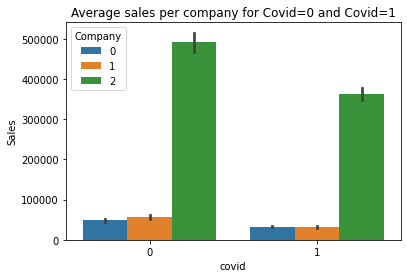

In [5]:
sns.barplot(x="covid", y="Sales", hue="Company", data=train_df, estimator=np.mean)
plt.title("Average sales per company for Covid=0 and Covid=1")
plt.show()

As can be seen from the plot, Covid has a decreasing effect on the sales

## Date Conversion

The DayOfYear column can help capture any seasonal patterns in the data, as it represents the day of the year (e.g., January 1st would be day 1, December 31st would be day 365). This can help the model recognize any trends that occur around specific times of the year.

The Quarter column can provide additional information on the seasonality of sales. This column represents the quarter of the year (1-4) in which a specific date falls, and can help the model identify patterns that occur during different parts of the year.

The WeekOfYear and DayOfWeek columns can also provide insights into weekly patterns. The WeekOfYear column represents the week number of the year (1-52), and the DayOfWeek column represents the day of the week (0-6, with 0 being Monday and 6 being Sunday). This information can help the model recognize any weekly patterns that occur in the sales data.

The Day, Month, and Year columns can help the model identify any long-term trends in the data. For example, the Month column can help the model recognize any patterns that occur during specific months (e.g., sales may increase during the summer months).

Finally, the IsWeekend column can be useful in capturing any changes in customer behavior that occur on weekends. This column is a binary indicator (1 for weekends and 0 for weekdays), and can help the model recognize any changes in demand that occur on weekends.

In [6]:
train_df['DayOfYear'] = train_df['Date_form'].dt.dayofyear
train_df['Quarter'] = train_df['Date_form'].dt.quarter
train_df['WeekOfYear'] = train_df['Date_form'].dt.isocalendar().week
train_df['DayOfWeek'] = train_df['Date_form'].dt.dayofweek
train_df['Day'] = train_df['Date_form'].dt.day
train_df['Month'] = train_df['Date_form'].dt.month
train_df['Year'] = train_df['Date_form'].dt.year
train_df['IsWeekend'] = train_df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
train_df["WeekOfYear"] = train_df["WeekOfYear"].astype(int)



test_df['DayOfYear'] = test_df['Date_form'].dt.dayofyear
test_df['Quarter'] = test_df['Date_form'].dt.quarter
test_df['WeekOfYear'] = test_df['Date_form'].dt.isocalendar().week
test_df["WeekOfYear"] = test_df["WeekOfYear"].astype(int)
test_df['DayOfWeek'] = test_df['Date_form'].dt.dayofweek
test_df['Day'] = test_df['Date_form'].dt.day
test_df['Month'] = test_df['Date_form'].dt.month
test_df['Year'] = test_df['Date_form'].dt.year
test_df['IsWeekend'] = test_df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

##  Holiday Information Update 

This column is created by taking the logical OR of the IsHoliday and IsWeekend columns, which results in a binary indicator for whether a particular date falls on a holiday or a weekend. This information can be useful in identifying periods of time when sales may be different from typical weekdays, such as weekends or holidays.

The DataFrame is then modified by dropping the original IsHoliday and IsWeekend columns, which are no longer necessary since their information is now captured in the IsHolidayOrWeekend column.

In [7]:
train_df['IsHolidayOrWeekend'] = train_df['IsHoliday'] | train_df['IsWeekend']
temp_with_date = train_df.copy()
train_df=train_df.drop(['Date_form','IsHoliday','IsWeekend'],axis=1)

test_df['IsHolidayOrWeekend'] = test_df['IsHoliday'] | test_df['IsWeekend']
test_df=test_df.drop(['Date_form','IsHoliday','IsWeekend'], axis = 1)

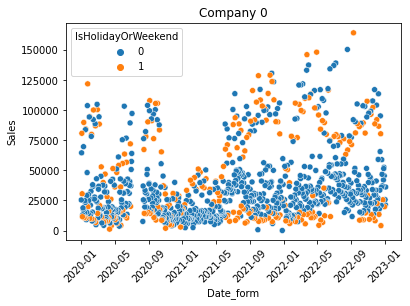

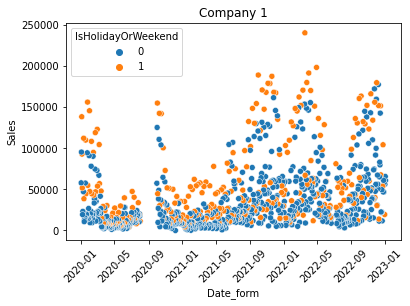

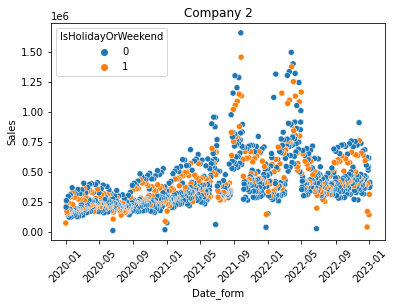

In [8]:
for i in range(3):
    sns.scatterplot(data=temp_with_date[temp_with_date['Company'] == i], x='Date_form', y='Sales', hue='IsHolidayOrWeekend').set(title='Company '+str(i))
    plt.xticks(rotation=45)
    plt.show()

## Adding seasons as a new column 

A new column that indicates the season of the year added to the DataFrame. This is achieved by iterating over the Month column and assigning a value of 1, 2, 3, or 4 to the Season column, depending on which season the corresponding month falls into. For example, if the month is March, April, or May, the value assigned to the Season column is 1, representing spring. Similarly, if the month is June, July, or August, the value assigned to the Season column is 2, representing summer. The same approach is used to assign values to the Season column for autumn and winter months.

This new column can be useful for the sales forecast model, as it can help capture any seasonality patterns that may exist in the data. For example, sales may be higher in the summer months due to warmer weather, or due to holiday events and people tend to go out. By adding the Season column, the model can more easily identify these patterns and adjust its forecasts accordingly.

In [9]:
seasons = []
for month in train_df["Month"]:
    if month in [3, 4, 5]:
        seasons.append(1) 
    elif month in [6, 7, 8]:
        seasons.append(2) 
    elif month in [9, 10, 11]:
        seasons.append(3) 
    else:
        seasons.append(4)
train_df["Season"] = seasons

test_seasons = []
for month in test_df["Month"]:
    if month in [3, 4, 5]:
        test_seasons .append(1) 
    elif month in [6, 7, 8]:
        test_seasons .append(2) 
    elif month in [9, 10, 11]:
        test_seasons .append(3) 
    else:
        test_seasons .append(4)
test_df["Season"] = test_seasons

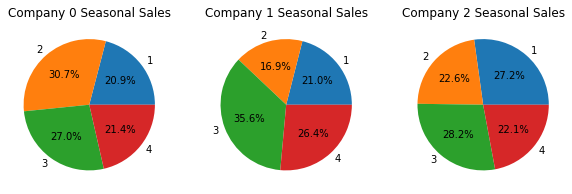

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
company_season_sales = train_df.groupby(['Company', 'Season'])['Sales'].mean()
for company in train_df['Company'].unique():
    company_sales = company_season_sales[company]
    axs[company].pie(company_sales, labels=company_sales.index,autopct='%1.1f%%')
    axs[company].set_title(f"Company {company} Seasonal Sales")
plt.show()

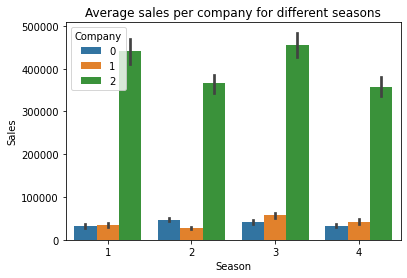

In [11]:
sns.barplot(x="Season", y="Sales", hue="Company", data=train_df, estimator=np.mean)
plt.title("Average sales per company for different seasons")
plt.show()

## Weather Data

Adding historical weather data to a restaurant sales forecasting model can be useful for several reasons:

1. Weather can influence consumer behavior: The weather can affect people's moods, preferences, and decision-making processes. For example, on a hot summer day, people may be more likely to choose a cold beverage or a salad over a hot soup or stew. Similarly, on a rainy day, people may be less likely to dine out and may prefer to stay at home. By incorporating weather data, the model can capture these effects and make more accurate predictions.

2. Seasonal trends: Weather patterns can be strongly correlated with seasonal trends in restaurant sales. For example, during the summer months, people may be more likely to dine out and enjoy outdoor seating, while during the winter months, people may prefer cozy indoor dining. By including weather data, the model can identify these seasonal patterns and adjust its predictions accordingly.

3. Capacity planning: Restaurants often need to adjust their staffing and inventory levels based on expected sales volume. By incorporating weather data, the model can provide more accurate forecasts of expected customer traffic, allowing restaurants to better plan for staffing and inventory needs.

4. Historical trends: Historical weather data can provide additional context for sales trends. For example, if sales were particularly high on a particular date, it may be useful to know that the weather was particularly nice on that day. This information can help restaurants make more informed decisions about marketing and promotions.

In order to combine the weather data with our data frame, we need to convert the date column to the format that we are using in our train dataframe.

In [12]:
drop_weat=weather1[["datetime","temp"]].copy()
drop2_weat=weather2[["datetime","temp"]].copy()

drop_weat['Date_form'] = pd.to_datetime(drop_weat['datetime'])
drop_weat['DayOfWeek'] = drop_weat['Date_form'].dt.dayofweek
drop_weat['Day'] = drop_weat['Date_form'].dt.day
drop_weat['Month'] = drop_weat['Date_form'].dt.month
drop_weat['Year'] = drop_weat['Date_form'].dt.year

drop2_weat['Date_form'] = pd.to_datetime(drop2_weat['datetime'])
drop2_weat['DayOfWeek'] = drop2_weat['Date_form'].dt.dayofweek
drop2_weat['Day'] = drop2_weat['Date_form'].dt.day
drop2_weat['Month'] = drop2_weat['Date_form'].dt.month
drop2_weat['Year'] = drop2_weat['Date_form'].dt.year

drop_combined = pd.concat([drop_weat, drop2_weat], ignore_index=True).reset_index(drop=True)

drop_combined.head()

,datetime,temp,Date_form,DayOfWeek,Day,Month,Year
0,2019-12-31,3.5,2019-12-31,1,31,12,2019
1,2020-01-01,3.3,2020-01-01,2,1,1,2020
2,2020-01-02,6.0,2020-01-02,3,2,1,2020
3,2020-01-03,5.7,2020-01-03,4,3,1,2020
4,2020-01-04,1.8,2020-01-04,5,4,1,2020


## Merging weather data and training data

In [13]:
merged_df = pd.merge(train_df, drop_combined, on=["Year", "Month", "Day",'DayOfWeek'], how= 'left')
merged_train_df=merged_df.drop(['Date_form','datetime',"Date"], axis = 1)
merged_train_df.head()

,Company,Sales,covid,DayOfYear,Quarter,WeekOfYear,DayOfWeek,Day,Month,Year,IsHolidayOrWeekend,Season,temp
0,2,384775.195733,0,4,1,1,2,4,1,2023,0,4,-5.4
1,1,60815.193532,0,4,1,1,2,4,1,2023,0,4,-5.4
2,0,36221.562895,0,4,1,1,2,4,1,2023,0,4,-5.4
3,1,65686.415376,0,3,1,1,1,3,1,2023,0,4,-3.6
4,2,411655.230277,0,3,1,1,1,3,1,2023,0,4,-3.6


In [14]:
merged_test_df = pd.merge(test_df, drop_combined, on=["Year", "Month", "Day",'DayOfWeek'], how= 'left')
merged_test_final=merged_test_df.drop(['Date_form','datetime',"Date"], axis = 1)
merged_test_final.head()

,Company,covid,DayOfYear,Quarter,WeekOfYear,DayOfWeek,Day,Month,Year,IsHolidayOrWeekend,Season,temp
0,0,0,19,1,3,3,19,1,2023,0,4,-0.9
1,1,0,19,1,3,3,19,1,2023,0,4,-0.9
2,2,0,19,1,3,3,19,1,2023,0,4,-0.9
3,0,0,18,1,3,2,18,1,2023,0,4,1.7
4,1,0,18,1,3,2,18,1,2023,0,4,1.7


In [15]:
train_new_df=merged_train_df
test_new_df=merged_test_final

In [16]:
train_new_df.head()

,Company,Sales,covid,DayOfYear,Quarter,WeekOfYear,DayOfWeek,Day,Month,Year,IsHolidayOrWeekend,Season,temp
0,2,384775.195733,0,4,1,1,2,4,1,2023,0,4,-5.4
1,1,60815.193532,0,4,1,1,2,4,1,2023,0,4,-5.4
2,0,36221.562895,0,4,1,1,2,4,1,2023,0,4,-5.4
3,1,65686.415376,0,3,1,1,1,3,1,2023,0,4,-3.6
4,2,411655.230277,0,3,1,1,1,3,1,2023,0,4,-3.6


In [17]:
train_new_df.head()

,Company,Sales,covid,DayOfYear,Quarter,WeekOfYear,DayOfWeek,Day,Month,Year,IsHolidayOrWeekend,Season,temp
0,2,384775.195733,0,4,1,1,2,4,1,2023,0,4,-5.4
1,1,60815.193532,0,4,1,1,2,4,1,2023,0,4,-5.4
2,0,36221.562895,0,4,1,1,2,4,1,2023,0,4,-5.4
3,1,65686.415376,0,3,1,1,1,3,1,2023,0,4,-3.6
4,2,411655.230277,0,3,1,1,1,3,1,2023,0,4,-3.6


# Machine Learning

In [18]:
!pip install xgboost==1.7.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

## Split Data train,test and validation.

In [20]:
train_x = train_new_df.loc[:, train_new_df.columns != 'Sales']
train_y = train_new_df.loc[:, train_new_df.columns == 'Sales']

In [21]:
from sklearn.model_selection import train_test_split

# split the training data into train and validation sets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=123)

# print the shapes of the resulting datasets
print("Training set shape:", train_x.shape)
print("Validation set shape:", val_x.shape)
print("Training labels shape:", train_y.shape)
print("Validation labels shape:", val_y.shape)


Training set shape: (2468, 12)
Validation set shape: (617, 12)
Training labels shape: (2468, 1)
Validation labels shape: (617, 1)


## Linear Regression

In [22]:
clf = LinearRegression()
clf.fit(train_x, train_y)

train_pred = clf.predict(val_x)

# calculate RMSD of the prediction

rmsd = mean_squared_error(val_y, train_pred, squared = False)
print(rmsd)

155353.3399604479


## Random Forest Regressor

In [23]:
rfModel = RandomForestRegressor(n_estimators=300)
rfModel.fit(train_x,np.ravel(train_y))

train_pred = rfModel.predict(val_x)
val_rmsd = mean_squared_error(val_y, train_pred, squared = False)
print(val_rmsd)

71951.0115383524


## KNN Regressor

In [24]:
knnModel = KNeighborsRegressor()
knnModel.fit(train_x,train_y)
knnPred = knnModel.predict(val_x)

rmsd = mean_squared_error(val_y, knnPred, squared = False)
print(rmsd)

224894.53524084683


## DecisionTree Regressor

In [25]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 2023) 
  
# fit the regressor with X and Y data
regressor.fit(train_x,np.ravel(train_y))
#cross_val_score(regressor, train_x,train_y, cv=10)
DecPred = regressor.predict(val_x)

rmsd = mean_squared_error(val_y, DecPred, squared = False)
print(rmsd)

118455.55605039261


## XGBoost Regressor

In [26]:
regressor = xgb.XGBRegressor(random_state=2023)

# fit the regressor with X and Y data
regressor.fit(train_x, train_y)

# make predictions on the train data
xgb_pred = regressor.predict(val_x)

# calculate the Mean squared error (MSE)
xgb_rmse = mean_squared_error(val_y, xgb_pred, squared=False)
print(xgb_rmse)

59188.182705838364


# HyperParamater Tuning

## Random Forest Tuning

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Tune hyperparameters with cross-validation on the validation set
param_dist = {'n_estimators': sp_randint(200, 1000),
              'max_features': sp_randint(1, 10),
              'max_depth': sp_randint(5, 30),
              'min_samples_split': sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 10)}

rfModel = RandomForestRegressor(n_estimators=300)
rfSearch = RandomizedSearchCV(estimator=rfModel,
                              param_distributions=param_dist,
                              cv=5, n_iter=20, n_jobs=-1,
                              scoring='neg_mean_squared_error',
                              random_state=123)
rfSearch.fit(train_x, np.ravel(train_y))

# Get the best model and best hyperparameters
best_rfModel = rfSearch.best_estimator_
best_params = rfSearch.best_params_

# Train the best model on the combined training and validation sets

best_rfModel.fit(train_x, np.ravel(train_y))

# Predict the sales for the test set and calculate the Mean squared error (MSE)
test_pred = best_rfModel.predict(val_x)
test_rmsd = mean_squared_error(val_y, test_pred, squared=False)
print("Test MSE:", test_rmsd)



Test MSE: 66034.3331126061


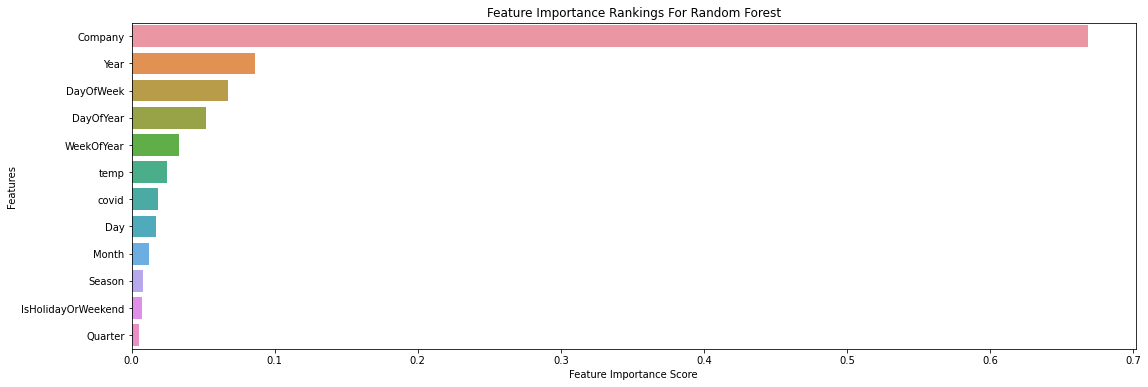

In [28]:
feature_importances = pd.Series(best_rfModel.feature_importances_, index=test_new_df.columns).sort_values(ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings For Random Forest")
plt.show()

## XGB Tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# define the parameter grid for RandomizedSearchCV
param_dist = {'max_depth': randint(1, 10),
              'learning_rate': uniform(0.01, 0.6),
              'n_estimators': randint(100, 500),
              'gamma': uniform(0, 1),
              'subsample': uniform(0.3, 0.7),
              'colsample_bytree': uniform(0.3, 0.7),
              'reg_alpha': uniform(0, 1),
              'reg_lambda': uniform(0, 1)}

# create an XGBRegressor model
regressor = xgb.XGBRegressor(random_state=2023)

# perform a randomized search with cross-validation
xgbSearch = RandomizedSearchCV(estimator = regressor,
                               param_distributions = param_dist,
                               cv = 5, n_iter = 20, n_jobs = -1, random_state = 123)

# fit the randomized search model to the training data
xgbSearch.fit(train_x, np.ravel(train_y))

# get the best model and best hyperparameters
best_regressor = xgbSearch.best_estimator_
best_params = xgbSearch.best_params_

# fit the best model to the training data
best_regressor.fit(train_x, train_y)

# make predictions on the train data
xgb_pred = best_regressor.predict(val_x)

# calculate the Mean squared error (MSE)
xgb_rmse = mean_squared_error(val_y, xgb_pred, squared=False)
print("Test MSE:", xgb_rmse)



Test MSE: 60533.337020011044


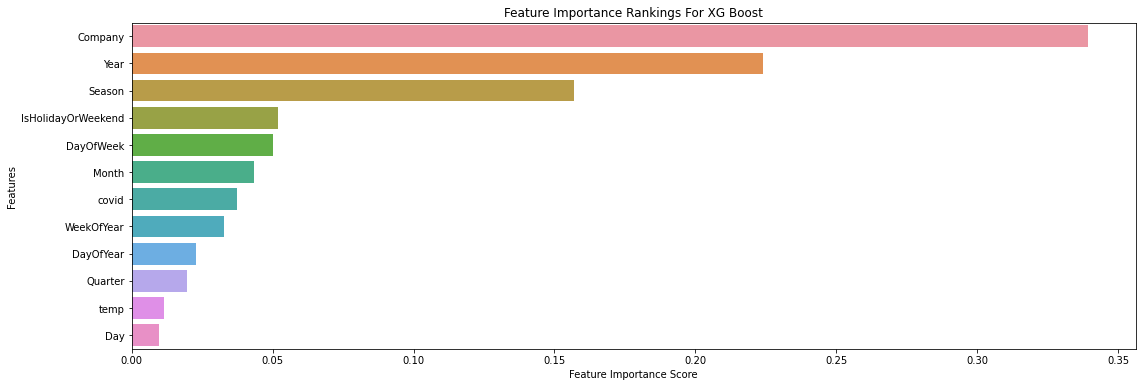

In [30]:
feature_importances = pd.Series(best_regressor.feature_importances_, index=test_new_df.columns).sort_values(ascending=False)

plt.figure(figsize=(18, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings For XG Boost")
plt.show()

# Split Data Company Approach

In [31]:
train_new_df['Company'].unique()

array([2, 1, 0])

## Split Data for each company

In [32]:
comp_0_train = train_new_df[train_new_df['Company'] == 0]
train_0_x = comp_0_train.drop(columns=['Sales'])
train_0_y = comp_0_train['Sales']
train_0_x, val_0_x, train_0_y, val_0_y = train_test_split(train_0_x, train_0_y, test_size=0.2, random_state=123)


test_0_x = test_new_df[test_new_df['Company'] == 0]

comp_1_train = train_new_df[train_new_df['Company'] == 1]
train_1_x = comp_1_train.drop(columns=['Sales'])
train_1_y = comp_1_train['Sales']
train_1_x, val_1_x, train_1_y, val_1_y = train_test_split(train_1_x, train_1_y, test_size=0.2, random_state=123)

test_1_x = test_new_df[test_new_df['Company'] == 1]

comp_2_train = train_new_df[train_new_df['Company'] == 2]
train_2_x = comp_2_train.drop(columns=['Sales'])
train_2_y = comp_2_train['Sales']
train_2_x, val_2_x, train_2_y, val_2_y = train_test_split(train_2_x, train_2_y, test_size=0.2, random_state=123)

test_2_x = test_new_df[test_new_df['Company'] == 2]

## Random Forest Hyperparameter Tuning for each company

### Company 0 RF Tuning

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model on the training set
rfModel = RandomForestRegressor(n_estimators=300)
rfModel.fit(train_0_x, np.ravel(train_0_y))

# Predict the sales for the validation set and calculate MSE
val_pred = rfModel.predict(val_0_x)
val_rmsd = mean_squared_error(val_0_y, val_pred, squared=False)
print("Validation MSE:", val_rmsd)

param_dist = {'n_estimators': sp_randint(200, 1000),
              'max_features': sp_randint(1, 10),
              'max_depth': sp_randint(5, 30),
              'min_samples_split': sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 10)}

rfModel = RandomForestRegressor()
rfSearch = RandomizedSearchCV(estimator=rfModel,
                              param_distributions=param_dist,
                              cv=5, n_iter=20, n_jobs=-1,
                              scoring='neg_mean_squared_error',
                              random_state=123)
rfSearch.fit(train_0_x, np.ravel(train_0_y))

# Get the best model and best hyperparameters
best_rfModel = rfSearch.best_estimator_
best_params = rfSearch.best_params_


best_rfModel.fit(train_0_x, np.ravel(train_0_y))

# Predict the sales for the test set and calculate MSE
test_pred = best_rfModel.predict(val_0_x)
test_rmsd = mean_squared_error(val_0_y, test_pred, squared=False)
print("Test MSE:", test_rmsd)

train_x = pd.concat([train_0_x, val_0_x])
train_y = pd.concat([train_0_y, val_0_y])
best_rfModel.fit(train_x, np.ravel(train_y))
rfTunedVal0 = best_rfModel.predict(test_0_x)



Validation MSE: 11482.072675451198
Test MSE: 12282.883560282442


### Company 1 RF Tuning

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model on the training set
rfModel = RandomForestRegressor(n_estimators=300)
rfModel.fit(train_1_x, np.ravel(train_1_y))

# Predict the sales for the validation set and calculate RMSD
val_pred = rfModel.predict(val_1_x)
val_rmsd = mean_squared_error(val_1_y, val_pred, squared=False)
print("Validation MSE:", val_rmsd)

# Tune hyperparameters with cross-validation on the validation set
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {'n_estimators': sp_randint(200, 1000),
              'max_features': sp_randint(1, 10),
              'max_depth': sp_randint(5, 30),
              'min_samples_split': sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 10)}

rfModel = RandomForestRegressor()
rfSearch = RandomizedSearchCV(estimator=rfModel,
                              param_distributions=param_dist,
                              cv=5, n_iter=20, n_jobs=-1,
                              scoring='neg_mean_squared_error',
                              random_state=123)
rfSearch.fit(train_1_x, np.ravel(train_1_y))

# Get the best model and best hyperparameters
best_rfModel = rfSearch.best_estimator_
best_params = rfSearch.best_params_


best_rfModel.fit(train_1_x, np.ravel(train_1_y))

# Predict the sales for the test set and calculate MSE
test_pred = best_rfModel.predict(val_1_x)
test_rmsd = mean_squared_error(val_1_y, test_pred, squared=False)
print("Test MSE:", test_rmsd)


train_x = pd.concat([train_1_x, val_1_x])
train_y = pd.concat([train_1_y, val_1_y])
best_rfModel.fit(train_x, np.ravel(train_y))
rfTunedVal1 = best_rfModel.predict(test_1_x)



Validation MSE: 16842.583883110114
Test MSE: 16995.19047679976


### Company 2 RF Tuning

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model on the training set
rfModel = RandomForestRegressor(n_estimators=300)
rfModel.fit(train_2_x, np.ravel(train_2_y))

# Predict the sales for the validation set and calculate the Mean squared error (MSE)
val_pred = rfModel.predict(val_2_x)
val_rmsd = mean_squared_error(val_2_y, val_pred, squared=False)
print("Validation MSE:", val_rmsd)


param_dist = {'n_estimators': sp_randint(200, 1000),
              'max_features': sp_randint(1, 10),
              'max_depth': sp_randint(5, 30),
              'min_samples_split': sp_randint(2, 20),
              'min_samples_leaf': sp_randint(1, 10)}

rfModel = RandomForestRegressor()
rfSearch = RandomizedSearchCV(estimator=rfModel,
                              param_distributions=param_dist,
                              cv=5, n_iter=20, n_jobs=-1,
                              scoring='neg_mean_squared_error',
                              random_state=123)
rfSearch.fit(train_2_x, np.ravel(train_2_y))

# Get the best model and best hyperparameters
best_rfModel = rfSearch.best_estimator_
best_params = rfSearch.best_params_


best_rfModel.fit(train_2_x, np.ravel(train_2_y))

# Predict the sales for the test set and calculate the Mean squared error (MSE)
test_pred = best_rfModel.predict(val_2_x)
test_rmsd = mean_squared_error(val_2_y, test_pred, squared=False)
print("Test MSE:", test_rmsd)

train_x = pd.concat([train_2_x, val_2_x])
train_y = pd.concat([train_2_y, val_2_y])
best_rfModel.fit(train_x, np.ravel(train_y))
rfTunedVal2 = best_rfModel.predict(test_2_x)



Validation MSE: 91818.98405694461
Test MSE: 86214.49233899778


## XGB Hyperparameter Tuning for each company

### Company 0 XGB tuning 

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# define the parameter grid for RandomizedSearchCV
param_dist = {'max_depth': randint(1, 10),
              'learning_rate': uniform(0.01, 0.6),
              'n_estimators': randint(100, 500),
              'gamma': uniform(0, 1),
              'subsample': uniform(0.3, 0.7),
              'colsample_bytree': uniform(0.3, 0.7),
              'reg_alpha': uniform(0, 1),
              'reg_lambda': uniform(0, 1)}

# create an XGBRegressor model
regressor = xgb.XGBRegressor(random_state=2023)

# perform a randomized search with cross-validation
xgbSearch = RandomizedSearchCV(estimator = regressor,
                               param_distributions = param_dist,
                               cv = 5, n_iter = 20, n_jobs = -1, random_state = 123)

# fit the randomized search model to the training data
xgbSearch.fit(train_0_x, train_0_y)

# get the best model and best hyperparameters
best_regressor = xgbSearch.best_estimator_
best_params = xgbSearch.best_params_

# fit the best model to the training data
best_regressor.fit(train_0_x, train_0_y)

# make predictions on the train data
xgb_pred = best_regressor.predict(val_0_x)

# calculate the Mean squared error (MSE)
xgb_rmse = mean_squared_error(val_0_y, xgb_pred, squared=False)
print("Test MSE:", xgb_rmse)

# make predictions on the test data
train_x = pd.concat([train_0_x, val_0_x])
train_y = pd.concat([train_0_y, val_0_y])
best_regressor.fit(train_x, np.ravel(train_y))
xgbPred0Tuned = best_regressor.predict(test_0_x)


Test MSE: 10558.417890408658


### Company 1 XGB tuning 

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# define the parameter grid for RandomizedSearchCV
param_dist = {'max_depth': randint(1, 10),
              'learning_rate': uniform(0.01, 0.6),
              'n_estimators': randint(100, 500),
              'gamma': uniform(0, 1),
              'subsample': uniform(0.3, 0.7),
              'colsample_bytree': uniform(0.3, 0.7),
              'reg_alpha': uniform(0, 1),
              'reg_lambda': uniform(0, 1)}

# create an XGBRegressor model
regressor = xgb.XGBRegressor(random_state=2023)

# perform a randomized search with cross-validation
xgbSearch = RandomizedSearchCV(estimator = regressor,
                               param_distributions = param_dist,
                               cv = 5, n_iter = 20, n_jobs = -1, random_state = 123)

# fit the randomized search model to the training data
xgbSearch.fit(train_1_x, train_1_y)

# get the best model and best hyperparameters
best_regressor = xgbSearch.best_estimator_
best_params = xgbSearch.best_params_

# fit the best model to the training data
best_regressor.fit(train_1_x, train_1_y)

# make predictions on the train data
xgb_pred = best_regressor.predict(val_1_x)

# calculate the Mean squared error (MSE)
xgb_rmse = mean_squared_error(val_1_y, xgb_pred, squared=False)
print("Test MSE:", xgb_rmse)

# make predictions on the test data
train_x = pd.concat([train_1_x, val_1_x])
train_y = pd.concat([train_1_y, val_1_y])
best_regressor.fit(train_x, np.ravel(train_y))
xgbPred1Tuned = best_regressor.predict(test_1_x)


Test MSE: 17729.669083710356


### Company 2 XGB tuning 

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# define the parameter grid for RandomizedSearchCV
param_dist = {'max_depth': randint(1, 10),
              'learning_rate': uniform(0.01, 0.6),
              'n_estimators': randint(100, 500),
              'gamma': uniform(0, 1),
              'subsample': uniform(0.3, 0.7),
              'colsample_bytree': uniform(0.3, 0.7),
              'reg_alpha': uniform(0, 1),
              'reg_lambda': uniform(0, 1)}

# create an XGBRegressor model
regressor = xgb.XGBRegressor(random_state=2023)

# perform a randomized search with cross-validation
xgbSearch = RandomizedSearchCV(estimator = regressor,
                               param_distributions = param_dist,
                               cv = 5, n_iter = 20, n_jobs = -1, random_state = 123)

# fit the randomized search model to the training data
xgbSearch.fit(train_2_x, train_2_y)

# get the best model and best hyperparameters
best_regressor = xgbSearch.best_estimator_
best_params = xgbSearch.best_params_

# fit the best model to the training data
best_regressor.fit(train_2_x, train_2_y)

# make predictions on the train data
xgb_pred = best_regressor.predict(val_2_x)

# calculate the Mean squared error (MSE)
xgb_rmse = mean_squared_error(val_2_y, xgb_pred, squared=False)
print("Test MSE:", xgb_rmse)

# make predictions on the test data
train_x = pd.concat([train_2_x, val_2_x])
train_y = pd.concat([train_2_y, val_2_y])
best_regressor.fit(train_x, np.ravel(train_y))
xgbPred2Tuned = best_regressor.predict(test_2_x)


Test MSE: 85506.21343316203


# Concatenation(For upload to kaggle)

In [39]:
test_0_x["Sales"] = rfTunedVal0
test_0_x["Company"] = 0
test_1_x["Sales"] = rfTunedVal1
test_1_x["Company"] = 1
test_2_x["Sales"] = rfTunedVal2
test_2_x["Company"] = 2

concat = pd.concat([test_0_x, test_1_x, test_2_x])
concat =concat.merge(test_df, on=["Company", "Year", "Month", "Day"], how= 'left')
concat['ID'] = concat['Date'] + "_" + concat['Company'].astype(str)

# print the data frame to a CSV file
# upload the output file to Kaggle for the competition

concat.to_csv("seperate_final_xgbTunedLast.csv", sep = ",", index = False, columns = ['ID', 'Sales'])

<ipython-input-39-0de8e243cf5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_0_x["Sales"] = rfTunedVal0
<ipython-input-39-0de8e243cf5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_0_x["Company"] = 0
<ipython-input-39-0de8e243cf5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b3ceaaa5-a951-4d65-85c8-fc4a25e025d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>